<a href="https://colab.research.google.com/github/domsoria/ESEMPI-COLAB/blob/main/predictMaskNoMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
from keras.applications import InceptionV3, inception_v3 
from keras.layers import Dense 
from keras.models import Model 
from keras.preprocessing.image import ImageDataGenerator 
from keras.optimizers import Adam 
import pathlib 
import math
import tensorflow as tf
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from PIL import Image
import urllib.request

In [14]:
def load_image(path):
  img = cv2.imread(path)
  img = cv2.resize(img,(224,224),3)
  plt.imshow(img)
  plt.show()
  img_array_batch = np.expand_dims(img, axis=0)
  # normalizzo i valori da 0..255 a 0..1
  img_array_batch = img_array_batch/255
  return img_array_batch

In [15]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [16]:
backbone = InceptionV3(weights='imagenet', include_top=False, pooling="avg")

In [17]:
x = backbone.output
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
classificatore = Dense(2, activation='softmax')(x)

In [23]:
model = Model(inputs=backbone.input, outputs=classificatore)
model.load_weights("drive/MyDrive/Colab Notebooks/MASKNOMASK/model2.h5")

In [27]:

URL = "https://www.intoscana.it/wp-content/uploads/shutterstock_1628718772.jpg"
#URL="https://ilfattoalimentare.it/wp-content/uploads/2020/03/coronavirus-ragazza-donna-mascherina-AdobeStock_258966698-scaled.jpeg"
#URL="https://lh3.googleusercontent.com/proxy/eoIJn-u1COjfOefuOVwqDEQlZWvpIP1uRXcMICCJY0z24QrFsTlIL5-Q-BKxummMmWPU6SwuYxuYLOTpfCPVbIs=s0-d"à
#URL="https://qph.fs.quoracdn.net/main-qimg-b86ff4fdfc72aeff3af8419340486f99"
with urllib.request.urlopen(URL) as url:
    with open('temp2.jpg', 'wb') as f:
        f.write(url.read())



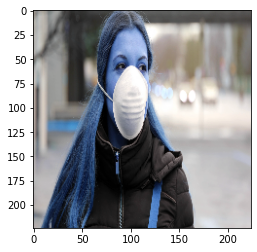

In [28]:
image_test1 = load_image('temp2.jpg')

In [29]:
tensore_predizione = model.predict(image_test1)
print(tensore_predizione)
predizionePercentuale = softmax(tensore_predizione)
print(predizionePercentuale)
print("Predizione MASK: " + str(predizionePercentuale[0][0]*100) + "%")
print("Predizione NO MASK: " + str(predizionePercentuale[0][1]*100) + "%")

[[9.999999e-01 9.928314e-08]]
[[0.73105854 0.2689415 ]]
Predizione MASK: 73.10585379600525%
Predizione NO MASK: 26.89414918422699%
